## Homoscedasticity
The main goal in building machine learning models is to create a model that is unbiased and accurate across all predictions. Homoscedasticity helps achieve this by ensuring that the errors in predictions are evenly spread out.

In simple term, homoscedasticity means that the errors (or mistakes) in ML model predictions are evenly spread out, no matter what value we’re predicting i.e. we want to make sure that our prediction errors are consistent. If some errors are spread out unevenly, that's a sign that something is wrong with our model. Thus, the residuals should have constant variance at every level of the independent variable(s).

For example: We collected data from students on the number of hours they studied and their corresponding test scores. When we plot the residuals (the differences between actual scores and predicted scores) against the number of hours studied, we can see that the spread of these residuals stays roughly the same across all hours.

For instance, whether students studied 1 hour or 10 hours, the errors in predicting their scores (how far off our predictions are) are about the same—some are a little high, some a little low, but all clustered evenly around zero.

This even means our model is performing well across all levels of study time, and you can confidently interpret how study hours affect test scores without worrying about changing error sizes.

**Why it is important?**
*  If residuals are no homoscedastic i.e. thye have non-consistent variance, Standard errors may be underestimated or overestimated, leading to invalid conclusions about the significance of predictors.
* If the variance of residuals changes at different levels of the independent variable(s), it complicates the interpretation of the coefficients. This gives the false impression about the importance of certain factors, which can lead to misleading conclusions.
* Non-constant variance can indicate that the model is misspecified. For example, it may suggest that a non-linear relationship exists or that an important variable has been omitted.

**How to Detect Homoscedasticity Issues**
* Plot the residuals against fitted values or independent variables. This is known as residual plot. A funnel shape or pattern indicates heteroscedasticity.
* Perform statistical tests like Breusch-Pagan or White's test which can formally assess homoscedasticity.

**What to Do If Heteroscedasticity Is Detected?**
* Applying transformations such as log, square root to the dependent variable can sometimes stabilize variance.
* Using Weighted Least Squares technique, which assigns weights to different observations based on the variance of their residuals.
* Using robust standard errors can provide valid inference even in the presence of heteroscedasticity.

Let's make hands dirty to see the above concept in action.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pprint import pprint

# Set a random seed for reproducibility
np.random.seed(0)

# Generate synthetic data
n = 100
x = np.linspace(1, 10, n)
# Create a linear relationship with some noise
y = 2 * x + np.random.normal(size=n)

# Create a DataFrame
data = pd.DataFrame({'x': x, 'y': y})

In [2]:
# Fit a linear regression model
X = sm.add_constant(data['x'])  # Add a constant (intercept)
model = sm.OLS(data['y'], X).fit()

# Get the residuals
residuals = model.resid

Next, we apply Breusch-Pagan test. For the evaluation of test statistics we have the following test hypothesis:

***Null Hypothesis***: The null hypothesis states that the residuals are homoscedastic (i.e., have constant variance).

***Alternative Hypothesis***: The residuals are not homoscedastic.

In [3]:
# Perform the Breusch-Pagan test for homoscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

# Get the fitted values
fitted_values = model.fittedvalues

# Conduct the test
bp_test = het_breuschpagan(residuals, X)
bp_test_results = {'Test Statistic': bp_test[0],
                                 'p-value': bp_test[1],
                                 'f-statistic': bp_test[2],
                                 'f p-value': bp_test[3]}

print("Breusch-Pagan Test Results:")
pprint(bp_test_results)

Breusch-Pagan Test Results:
{'Test Statistic': 1.0152757638398402,
 'f p-value': 0.31853053367212425,
 'f-statistic': 1.00517555232989,
 'p-value': 0.3136422382983186}


***Decision***: Typically, if the p-value is greater than 0.05, we fail to reject the null hypothesis. We have obtain test statistic as 1.015 and p-value = 0.31 which means we fail to reject null hypothesis. This suggests that there is no significant evidence of heteroscedasticity i.e. homoscedasticity is likely present. We can be confident enough that our model's predictions are consistent across wide range of data. 

We can validate the same through residual plot. 

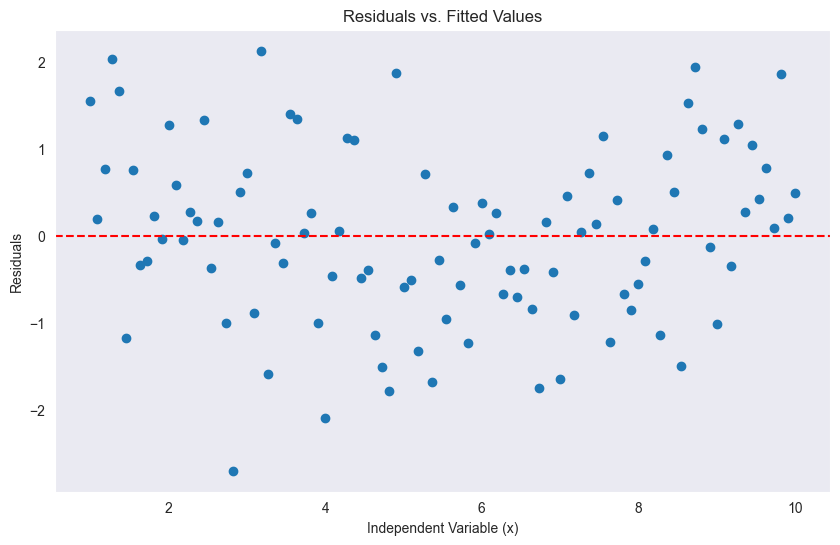

In [4]:
# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Residuals')
plt.grid()
plt.show()

From the above we can conclude following:
* Residual are randomly distributed centered around the horizontal line at 0.
* This shows that the model's errors have consistent variance across all levels of independent variables (x)


*Note: 
* If the spread of residuals increases or decreases as the independent variable changes (like a funnel opening wider or narrower) then it denotes heteroscedasticity.
* if the residual plot show a clear curve, this may suggest that the relationship between the independent and dependent variables is non-linear which means the linear model is not a good fit.
* If there's a presence of some data points that lies different than majority of the point, this indicates outlier which has high influence over Linear Regression. 